In [16]:
import pandas as pd #for making operation on dataset
from sklearn.preprocessing import StandardScaler #for feature scaling
from sklearn.model_selection import train_test_split #for test and train
from sklearn.linear_model import LogisticRegression #for logistic regression
from sklearn.metrics import accuracy_score #for counting accuracy score
from sklearn import svm #for support vector classificaton
from sklearn.neighbors import KNeighborsClassifier #for knn
from sklearn.tree import DecisionTreeClassifier #for decision tree
from sklearn.ensemble import RandomForestClassifier #for randon forest
import seaborn as sns #for graph
import joblib #for save model in joblib
from tkinter import * #for making gui

In [5]:
dh= pd.read_csv('heart_data.csv') #for read csv file and load data into pandas
dh

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [20]:
dh.isnull().sum() #for checking missing values 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
dh_dp = dh.duplicated().any() #for checking any duplicate value 

In [22]:
dh = dh.drop_duplicates() #for removing duplicate values

In [23]:
dh

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [24]:
dh_dp = dh.duplicated().any()
dh_dp

False

In [25]:
cat_cl=[] #categorical colum with empty list
num_cl=[] #numerical category with empty list

#use here nunique method from pandas
for column in dh.columns:         
    if dh[column].nunique() <= 10: #if value is less than 10 we will consider as categorical list
        cat_cl.append(column)
    else:                         # more than 10 will go to numerical value list
        num_cl.append(column)


In [26]:
cat_cl #list of categorical data

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [27]:
num_cl #list of numerical data

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [28]:
dh['cp'].unique() #for checking unique values in cp

array([0, 1, 2, 3], dtype=int64)

In [29]:
cat_cl.remove('sex')
cat_cl.remove('target')
dh=pd.get_dummies(dh,columns=cat_cl, drop_first=True)

In [30]:
dh.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [31]:
sc = StandardScaler()
dh[num_cl] = sc.fit_transform(dh[num_cl])

In [32]:
dh.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [33]:
x = dh.drop('target', axis=1)
y = dh['target']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=50)

In [34]:
x_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
224,-0.378671,1,0.478910,0.280639,1.593245,-0.899544,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
72,0.174856,1,-0.376556,0.048386,-0.243577,0.135360,0,0,0,1,...,1,1,0,1,0,0,0,0,1,0
184,-1.042904,1,-0.205463,1.190298,0.893503,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
367,-0.710788,1,-1.232023,-0.338703,0.806035,-0.037124,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
512,-1.153610,1,-1.117961,0.841918,0.150027,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,-0.710788,1,-0.433587,0.164513,1.112172,-0.899544,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
163,-0.710788,1,-0.433587,0.532247,0.718568,-0.468334,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
633,0.728383,1,0.364848,-1.558032,-1.074521,2.205168,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
129,0.285561,1,0.478910,-1.054817,-0.068642,-0.554576,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [35]:
y_train

224    1
72     0
184    1
367    0
512    0
      ..
76     1
163    0
633    0
129    1
239    0
Name: target, Length: 241, dtype: int64

In [36]:
lr = LogisticRegression() #logistic regression
lr.fit(x_train, y_train)

LogisticRegression()

In [37]:
y_pred1 = lr.predict(x_test)
lr_a = accuracy_score(y_test,y_pred1)
print('accuracy score for logistic regression is:',lr_a)

accuracy score for logistic regression is: 0.8524590163934426


In [38]:
svm= svm.SVC()
svm.fit(x_train,y_train)
y_pred2= svm.predict(x_test)
svm_a=accuracy_score(y_test,y_pred2)
print('accuracy score for svm is:',svm_a)

accuracy score for svm is: 0.8688524590163934


In [39]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
y_pred3= kn.predict(x_test)
knn_a= accuracy_score(y_test,y_pred3)
print('accuracy score for knn is:',knn_a)

accuracy score for knn is: 0.8688524590163934


C:\Users\gikur\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [40]:
score = []

for k in range(1,40):
    kn= KNeighborsClassifier(n_neighbors=k)
    kn.fit(x_train,y_train)
    y_pred3 =kn.predict(x_test)
    score.append(accuracy_score(y_test,y_pred3))
kn= KNeighborsClassifier(n_neighbors=1)
kn.fit(x_train,y_train)
y_pred=kn.predict(x_test)
score.append(knn_a)
print('accuracy score for knn is:',knn_a)

C:\Users\gikur\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\gikur\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

accuracy score for knn is: 0.8688524590163934


C:\Users\gikur\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\gikur\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [41]:
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred4= dt.predict(x_test)
dt_a=accuracy_score(y_test,y_pred4)
print('accuracy score for decision tree is:',dt_a)

accuracy score for decision tree is: 0.7540983606557377


In [42]:
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred5= rf.predict(x_test)
rf_a=accuracy_score(y_test,y_pred5)
print('accuracy score for random forest is:',rf_a)

accuracy score for random forest is: 0.8360655737704918


In [44]:
model_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF'],
                    'ACC':[lr_a,svm_a,knn_a,dt_a,rf_a]})

In [45]:
model_data

,Models,ACC
0,LR,0.852459
1,SVM,0.868852
2,KNN,0.868852
3,DT,0.754098
4,RF,0.836066


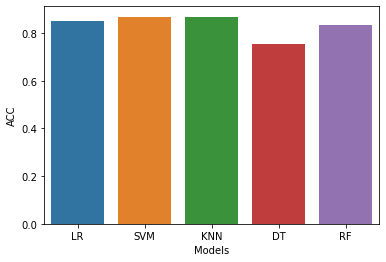

In [46]:
sns.barplot(model_data['Models'],model_data['ACC'])

In [7]:
new_d=pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3,
},index=[0])
new_d

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [9]:
x.shape

(1025, 13)

In [10]:
import pandas as pd
from sklearn.svm import SVC

y = dh['target']
x = dh.drop('target', axis=1)  # Assuming you want all other columns as features
svm = SVC()

# Train the SVM
svm.fit(x, y)

d = svm.predict(new_d) # Predict using the SVM

# Check the prediction and display the result
if d[0] == 0:
    print('No heart disease.')
else:
    print('Heart disease detected.')

Heart disease detected.
